<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/20%20-%20Sklearn%20(les%20Bases).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20/30 Apprentissage Supervisé avec Sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1. Régression

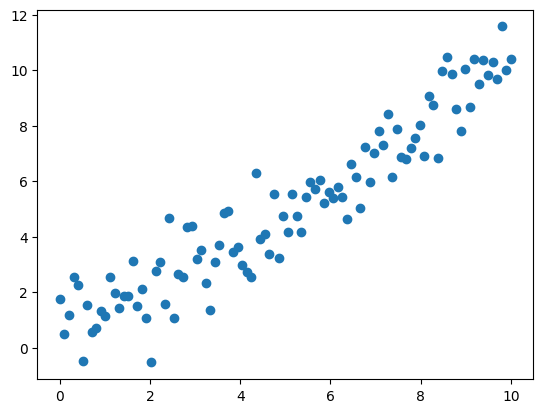

In [8]:

# Fixer la graine pour assurer la reproductibilité des résultats aléatoires
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1)
y = X + np.random.randn(m, 1)
plt.scatter(X, y)


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation avec le coefficient de corrélation

0.8881140743377214

In [23]:
print(y[4],model.predict(X)[4])

[2.03080664] 0.9114924928031058


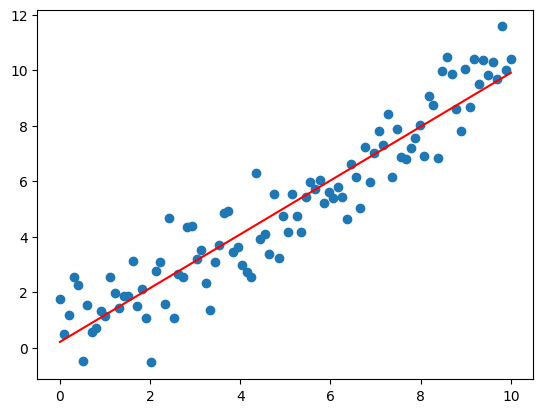

In [17]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red')

DATASET non linéaire

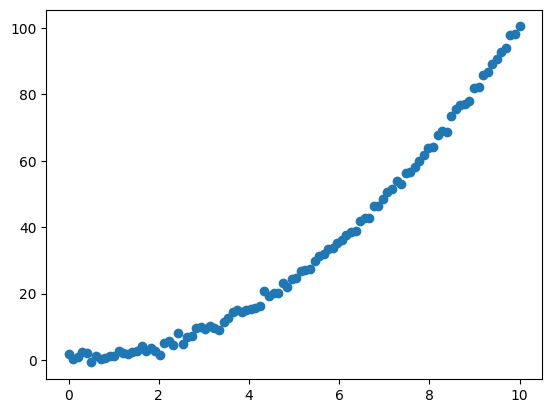

In [18]:
# Fixer la graine pour assurer la reproductibilité des résultats aléatoires
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1)
y = X**2 + np.random.randn(m, 1)
plt.scatter(X, y)

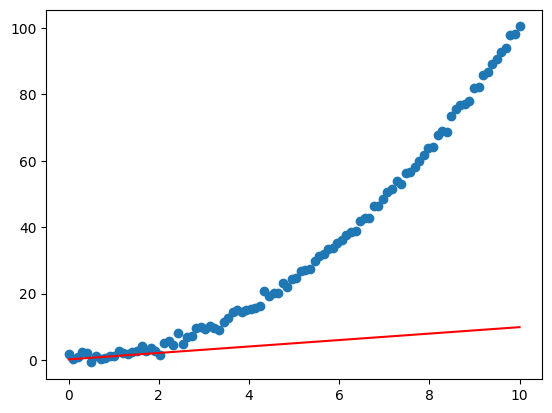

In [19]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red')

In [20]:
from sklearn.svm import SVR

In [21]:
model = SVR(C=100)
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation avec le coefficient de corrélation

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9989763625652847

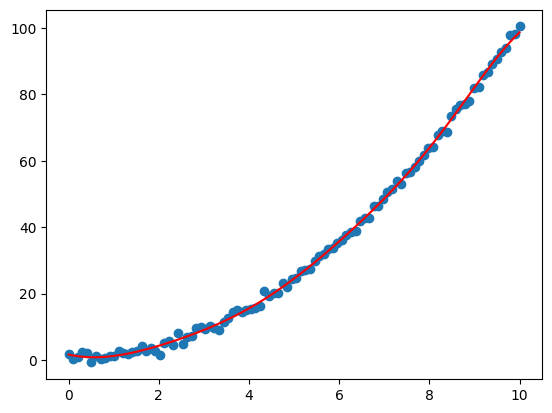

In [22]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red')

In [25]:
print(y[9],model.predict(X)[9])

[1.23704478] 1.1019599187134475


##2. Classification

In [26]:
#importer le dataset avec Seaborn
titanic = sns.load_dataset('titanic')
#Filtrer les champs
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
#inplace=True => appliquer une modification directe sur le dataframe titanic(pas besoin d'écrire titanic=titanic...)
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

/tmp/ipython-input-26-2378093392.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
/tmp/ipython-input-26-2378093392.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
model = KNeighborsClassifier(n_neighbors=9)

In [47]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)


In [48]:
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation

0.8179271708683473

##3. Prediction de survie

In [35]:
def survie(model, pclass=1, sex=0, age=10):
  x = np.array([pclass, sex, age]).reshape(1, 3)
  print(model.predict(x))
  print(model.predict_proba(x))

In [36]:
survie(model)

[1]
[[0.4 0.6]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## 4. Exercice et Solution
Écrire un code qui permet de trouver la meilleure valeur de voisin n_neighbors pour le modele de KNeighborsClassifier.

Dans sklearn, il est possible de faire cela avec la classe GridSearchCV. Mais il peut également etre utile de savoir écrire soi-meme ce genre de code de recherche.

4


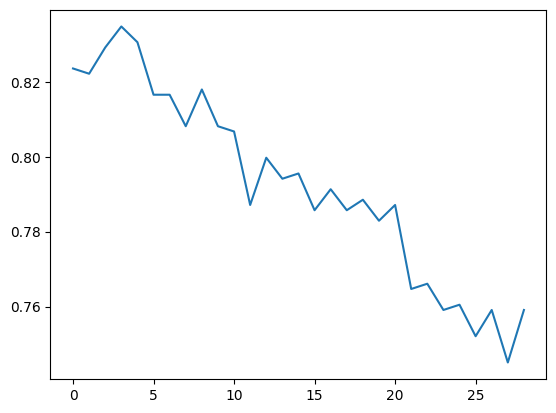

In [50]:
# SOLUTION
score = []
best_k = 1
best_score = 0

for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    score.append(model.score(X, y))

    if best_score < model.score(X, y):
        best_k = k
        best_score = model.score(X, y)

print(best_k)
plt.plot(score)